In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f=open('././movieReviews1000.txt',"r")                #opening file in read mode
#contents is a list with each elements as a line of the text
text=f.readlines()                       #reading the whole line
N=len(text)                              #total number of lines

#removing End Labels
label=[]                                 #empty list to store lable 
for i in range(N):
    label.append((text[i][len(text[i])-2]))   #appending the  lable from the test lines
    label[i]=int((label[i]))                 
    #print(label[i])
    text[i]=text[i][:(len(text[i])-2)]         #updating text by removing label
    
    
y_test=label[750:1000]                    #this will store last 250 samples to y_test
y_train=label[0:750]                      #this will store first 750 samples in y_train

print("\nSize of whole data in number of lines is :",N)



Size of whole data in number of lines is : 1000


In [3]:
pca = PCA(n_components=10)                      #PCA for 10 dimension

#vectoriztion
vectorizer = TfidfVectorizer()                  #tfidf
vectors = vectorizer.fit_transform(text)
feature_names = vectorizer.get_feature_names()
X_train = vectors.todense()

print("\nthe dimension of whole data before applying pca and before dividing it to test and train :",X_train.shape)   #dim (1000,3109)


pca.fit(X_train)                                 #dimensionlity reduction in whole train data
X_train = pca.transform(X_train)

X_test=X_train[750:1000]                         #storing last 250 samples of train in X_train
X_train=X_train[0:750]                           ##storing first 750 samples of train in X_train

y_train_1=np.array(y_train)
y_test_1=np.array(y_test)

print("\nthe dimension of X_test  after applying pca is :",X_test.shape)               #dim (250,10)
print("the dimension of X_train after applying pca is :",X_train.shape)             #dim (750,10)

print("\nthe dimension of y_test that is labels of test dataset :",y_test_1.shape)               #dim (250,)
print("the dimension of y_train that is labels of train dataset :",y_train_1.shape)             #dim (750,)



the dimension of whole data before applying pca and before dividing it to test and train : (1000, 3109)

the dimension of X_test  after applying pca is : (250, 10)
the dimension of X_train after applying pca is : (750, 10)

the dimension of y_test that is labels of test dataset : (250,)
the dimension of y_train that is labels of train dataset : (750,)


In [4]:
#looping for different kernel and for polynomial function looping for different degrees

degrees = [1,2, 3, 5, 7,10]                   #a list, which contains degrees of polynomial
kernel=['linear','poly','rbf']                #kernels which we will be comparing
CS=[1, 10, 20,30,40,50,70]                    #penalty

accuracy_linear=[]
accuracy_rbf=[]
accuracy_poly1=[]
accuracy_poly2=[]
accuracy_poly3=[]
accuracy_poly5=[]
accuracy_poly7=[]
accuracy_poly10=[]
sv=[]

for k in kernel:
    print("\n\n\n\n Kernel =",k)
    
    print("\n")
    if(k=='poly'):
        for degree in degrees:
            print("\n Degree",degree)
            
            min_acc=1
            for c in CS:
                clf=SVC(kernel=k,random_state=0,C=c,gamma=0.1,degree=degree).fit(X_train,y_train)    #extra degree variable
                total_sv=len(clf.support_vectors_)
                y_pred=clf.predict(X_test)
                
                acurracy=sum(y_pred==y_test)              #calculating correctly classified 
                misclassified=sum(y_pred!=y_test)         #calculating incorrectly classified 
                size=len(y_test)
                acc=acurracy/size                         #accuracy 
                #format(321,".2f")
                print("penalty ",format(c,".2f"),"\t\t Accuracy",format(acc,".2f"),"\t\t support vectors",format(total_sv,".2f"),"\t\t misclassified",format(misclassified,".2f"))
                
                
                
                if(degree==1):
                    accuracy_poly1.append(acc)
                    sv.append(total_sv)
                elif(degree==2):
                    accuracy_poly2.append(acc)
                elif(degree==3):
                    accuracy_poly3.append(acc) 
                elif(degree==5):
                    accuracy_poly5.append(acc) 
                elif(degree==7):
                    accuracy_poly7.append(acc) 
                elif(degree==10):
                    accuracy_poly10.append(acc)
                   
                    
                            
                            
    else:                                                      #this else is for kernels linear and rbf
        for c in CS:
            clf=SVC(kernel=k,random_state=0,C=c,gamma=0.1).fit(X_train,y_train)
            total_sv=len(clf.support_vectors_)  
            y_pred=clf.predict(X_test)
            
            acurracy=sum(y_pred==y_test)                         #calculating correctly classified for linear and rbf
            misclassified=sum(y_pred!=y_test)                    #calculating incorrectly classified for linear and rbf
            size=len(y_test)
            acc=acurracy/size
            
            if(k=='linear'):
                   accuracy_linear.append(acc)
            elif(k=='rbf'):
                accuracy_rbf.append(acc)
            
            print("penalty ",format(c,".2f"),"\t\t Accuracy",format(acc,".2f"),"\t\t support vectors",format(total_sv,".2f"),"\t\t misclassified",format(misclassified,".2f"))
    print("\n")






 Kernel = linear


penalty  1.00 		 Accuracy 0.44 		 support vectors 682.00 		 misclassified 140.00
penalty  10.00 		 Accuracy 0.61 		 support vectors 634.00 		 misclassified 97.00
penalty  20.00 		 Accuracy 0.63 		 support vectors 619.00 		 misclassified 92.00
penalty  30.00 		 Accuracy 0.63 		 support vectors 615.00 		 misclassified 92.00
penalty  40.00 		 Accuracy 0.64 		 support vectors 610.00 		 misclassified 89.00
penalty  50.00 		 Accuracy 0.65 		 support vectors 610.00 		 misclassified 88.00
penalty  70.00 		 Accuracy 0.61 		 support vectors 609.00 		 misclassified 97.00






 Kernel = poly



 Degree 1
penalty  1.00 		 Accuracy 0.39 		 support vectors 696.00 		 misclassified 153.00
penalty  10.00 		 Accuracy 0.44 		 support vectors 682.00 		 misclassified 140.00
penalty  20.00 		 Accuracy 0.53 		 support vectors 669.00 		 misclassified 117.00
penalty  30.00 		 Accuracy 0.57 		 support vectors 661.00 		 misclassified 108.00
penalty  40.00 		 Accuracy 0.60 		 support vector

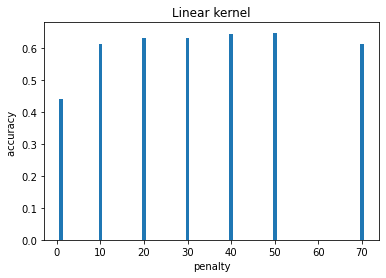

In [5]:
#graph for accuracy when linear kernel is applied with respect to the penalty

plt.bar(CS, accuracy_linear)
plt.xlabel("penalty")
plt.ylabel("accuracy ")
plt.title("Linear kernel")
plt.savefig('linear.png')

plt.show()

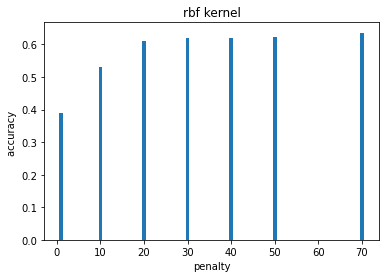

In [6]:
#graph for accuracy when rbf kernel is applied with respect to the penalty

plt.bar(CS, accuracy_rbf)
plt.xlabel("penalty")
plt.ylabel("accuracy ")
plt.title("rbf kernel")
plt.savefig('rbf.png')

plt.show()

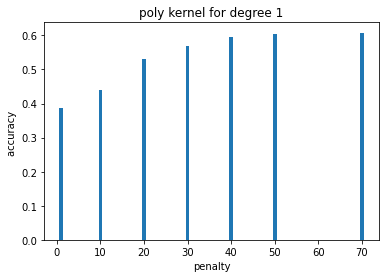

In [7]:
#graph for accuracy when polynomial  kernel is applied with respect to the penalty

plt.bar(CS, accuracy_poly1)
plt.xlabel("penalty")
plt.ylabel("accuracy ")
plt.title("poly kernel for degree 1")
plt.savefig('polynomiald1.png')
plt.show()

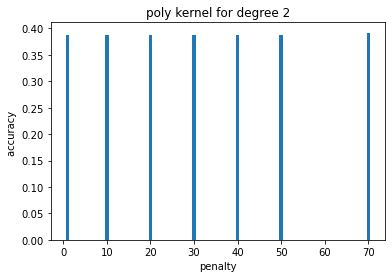

In [8]:
#graph for accuracy when polynomial  kernel is applied with respect to the penalty

plt.bar(CS, accuracy_poly2)
plt.xlabel("penalty")
plt.ylabel("accuracy ")
plt.title("poly kernel for degree 2")
plt.savefig('polynomiald2.png')
plt.show()

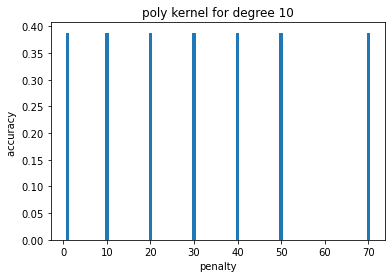

In [9]:
#graph for accuracy when polynomial  kernel is applied with respect to the penalty

plt.bar(CS, accuracy_poly10)
plt.xlabel("penalty")
plt.ylabel("accuracy ")
plt.title("poly kernel for degree 10")
plt.savefig('polynomiald10.png')
plt.show()

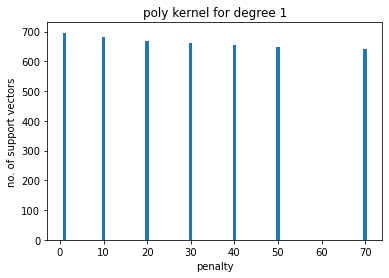

In [10]:
plt.bar(CS,sv)
plt.xlabel("penalty")
plt.ylabel("no. of support vectors")
plt.title("poly kernel for degree 1")
plt.savefig('polynomialsv.png')
plt.show()

### Observations:
###  You can see the graph above plotted between the accuracy for a particular kernel and the penalty for missclassfication

###  I observed that for all types of kernel, if i increase the penalty for misclassification then accuracy increases. but here mostly accuracy becomes stable after few penalty as we have less data .

### Note:Estimated parameters converge in probability to true parameters when the number of samples is sufficiently large.

### for the above data set, Linear and rbf kernel gives almost almost same accuracy for different penalties.

###  polynomial kernel, we know that as we increase the degree of polynomial our training accuracy increases. 

###  on comparing linear kernel with degree 1 polynomial , we are getting the same accuracies. but as degree increases our accuracies with penalty do not vary much in polynomial kernel, this may be because the data is already overfitted. 

### hence as we increase the degree of polynomial ,the traning data fits more properly ,but on test data the accuracy decreases . for the above data linear (degree 1) polynomial is best fit , because after degree 2 we are getting less test accuracy (overfiiting on train data).

### so here the order of polynomials play a very important role for generalization purpose. also  as the order of polynomial increases both kind of error decreases ,later is becomes stable.